In [11]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split as TTS ,cross_val_score as CSV
from xgboost import XGBClassifier

In [12]:
df =pd.read_csv('XGB_Gain_data.csv')
N = 4
X = df.iloc[:,1:N]
y = df.iloc[:,15]
X_train,X_test,y_train,y_test = TTS (
    X,y,test_size = 0.15,random_state = 9,stratify = y)

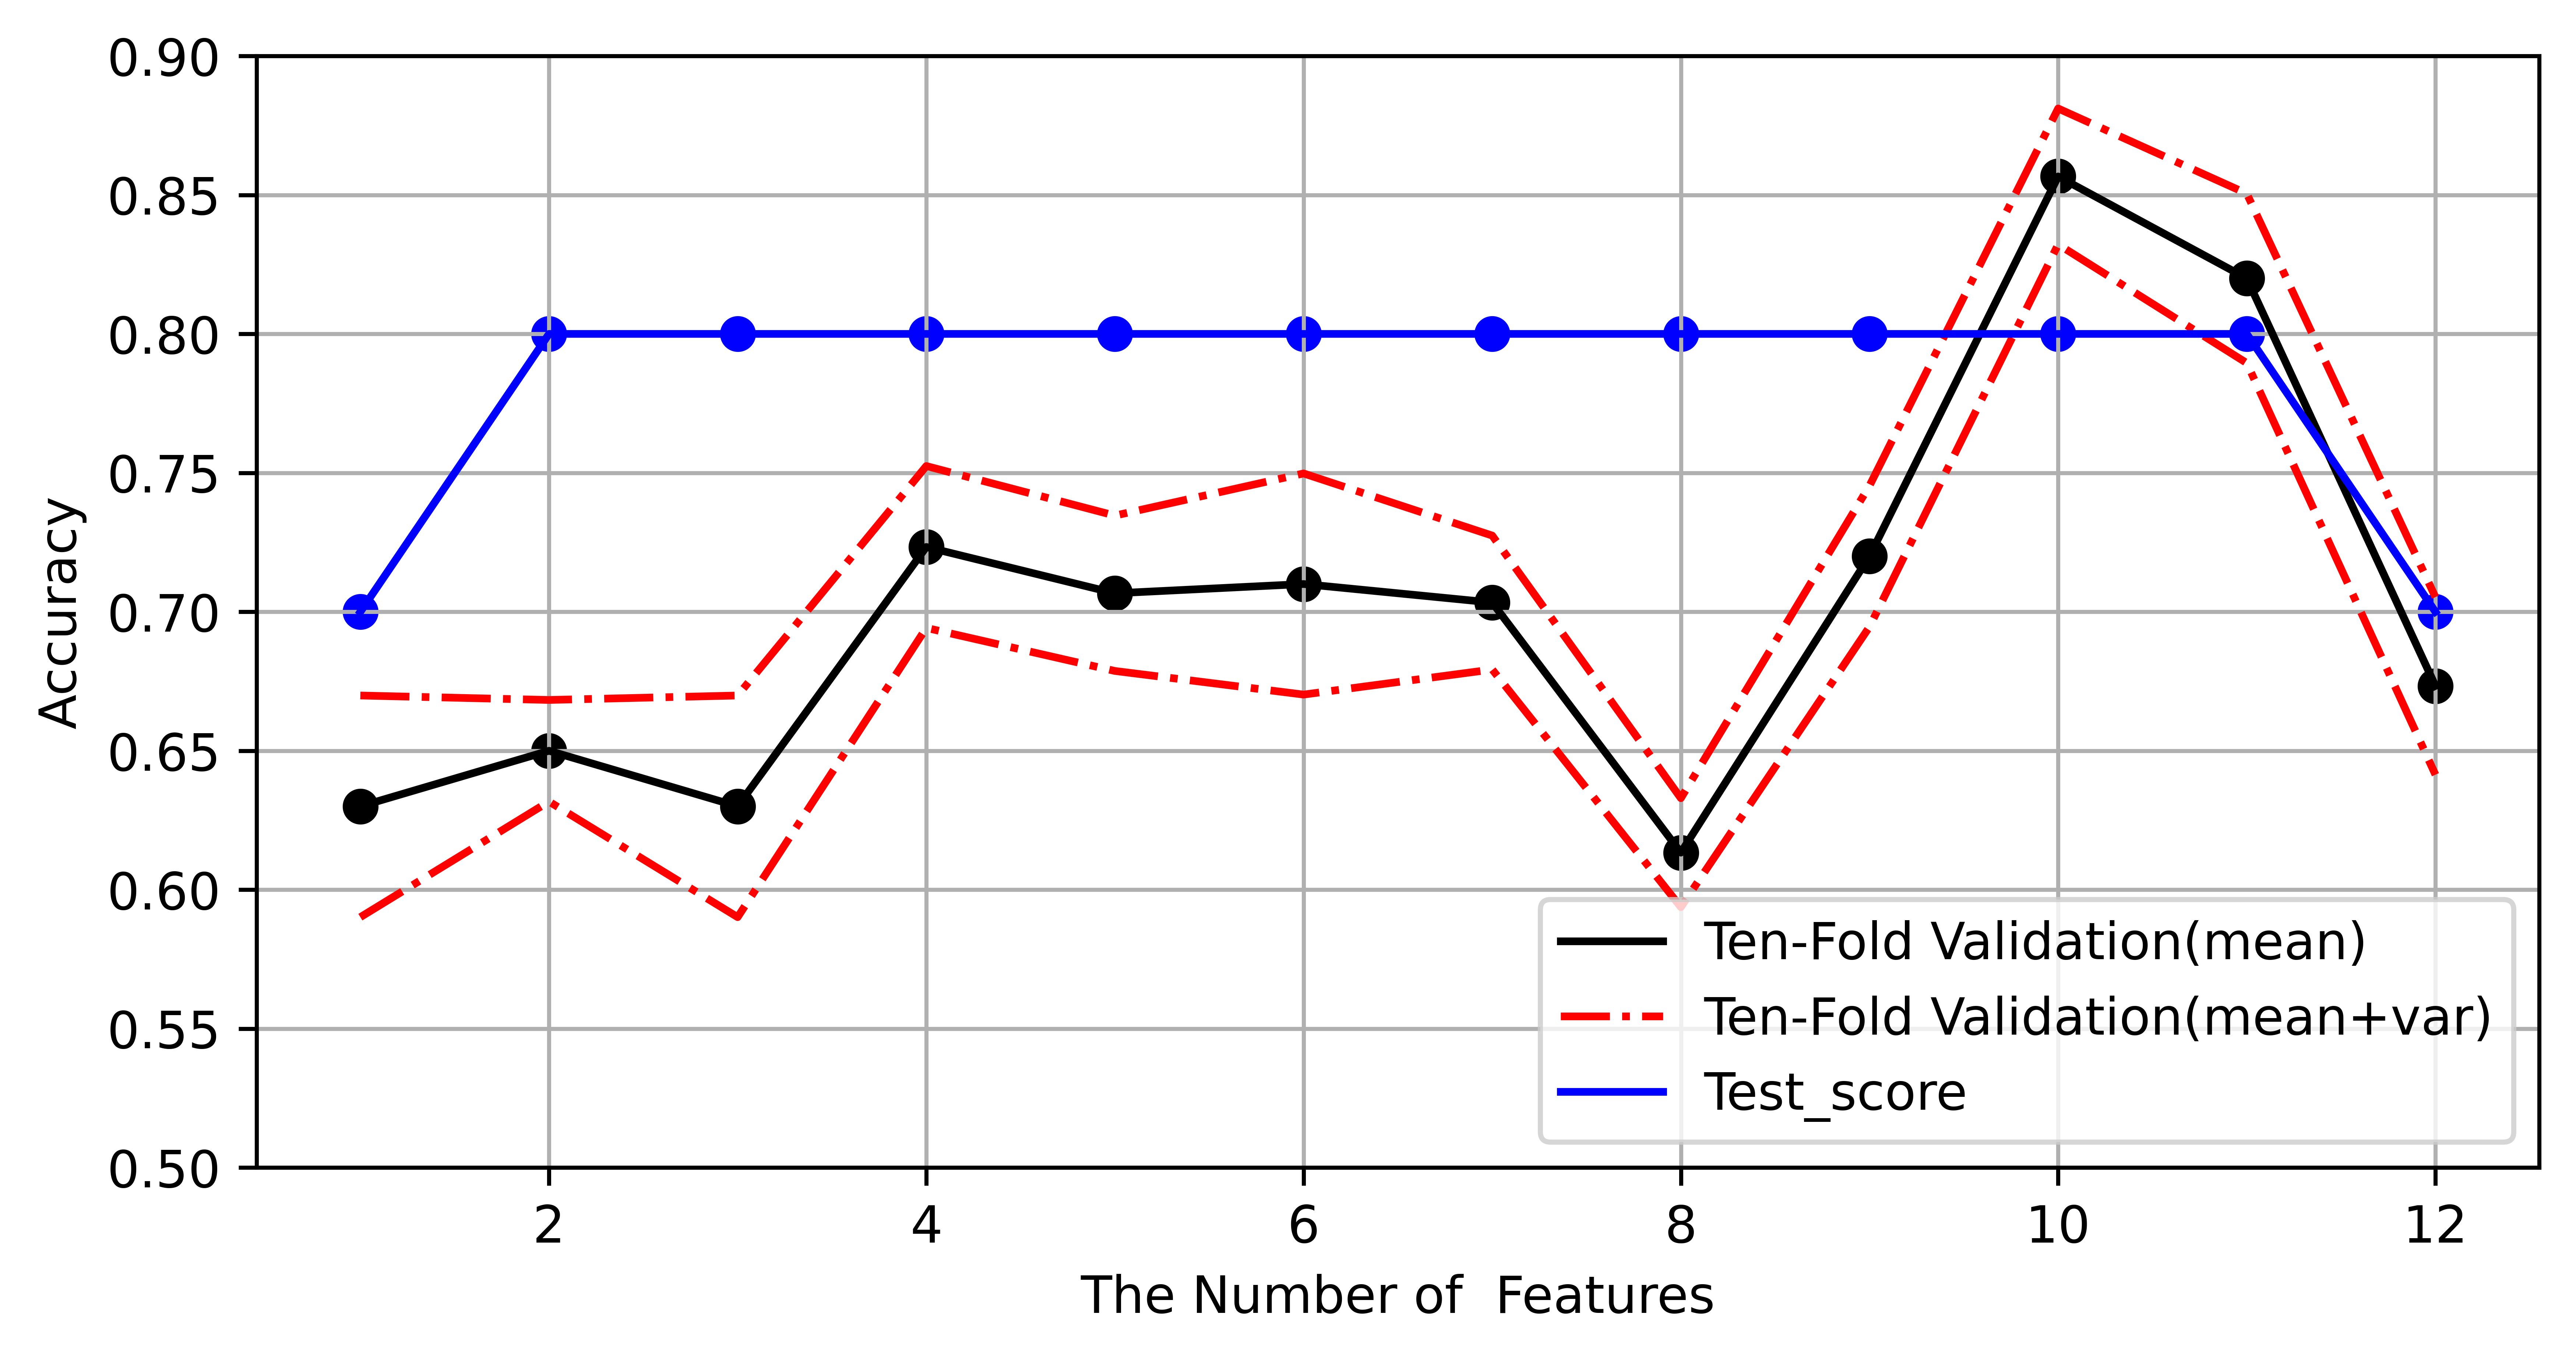

In [13]:
mean_=[]
var_ =[]
ts_ = []
for i in range(2,14):
        X = df.iloc[:,1:i]
        y = df.iloc[:,15]
        X_train,X_test,y_train,y_test = TTS (X,y,test_size = 0.15,random_state = 9,stratify = y)
        XGBG = XGBClassifier(colsample_bytree=0.7, gamma=0.4, learning_rate=0.4, max_depth=8, 
                            min_child_weight=1, n_estimators=26, subsample=0.4)
        XGBG.fit(X_train, y_train)
        ts = XGBG.score(X_test,y_test)
        CSV_ = CSV(XGBG,X_train,y_train,cv=10)
        mean = CSV_.mean()
        var = CSV_.var()
        mean_.append(mean)
        var_.append(var)
        ts_.append(ts)
axis = range(1,13)
mean_ = np.array(mean_)
var_ = np.array(var_)
ts_ = np.array(ts_)
#print('the random state value is ',j)
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 4), dpi=1000)
plt.plot(axis,mean_,c='black',label = 'Ten-Fold Validation(mean)')
plt.scatter(axis,mean_,c='black')
plt.plot(axis,mean_+ var_,c= 'red',linestyle = '-.',label = 'Ten-Fold Validation(mean+var)')
plt.plot(axis,mean_- var_,c= 'red',linestyle = '-.')
plt.plot(axis,ts_ ,c = 'blue',label = 'Test_score')
plt.scatter(axis,ts_,c='blue')
plt.xlabel('The Number of  Features')
plt.ylabel('Accuracy')
plt.grid()
plt.legend(loc=4)
plt.ylim(0.5,0.9)
plt.show()